# ML_test_score_data_analysis

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\scores_data.csv")

In [3]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#this is dataset with no null values no duplicates 
# there are 150 ID's i.es datapoints with three features

In [8]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

# Data cleaning and anaysis

In [9]:
df.columns = df.columns.str.replace(' ','')

In [10]:
df['Score']=df['Score'].str.split("/").str[0].astype("int")

In [11]:
#df['Score']=df['Score'].str.replace('7','')

In [12]:
df["Score"].unique()

array([6, 7, 4, 5, 3, 2, 0, 1])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.0+ KB


In [14]:
print(df['Score'].min())

print(df['Score'].max())

0
7


<AxesSubplot:>

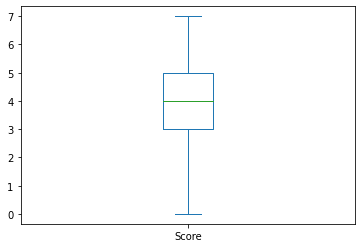

In [15]:
df['Score'].plot(kind='box')

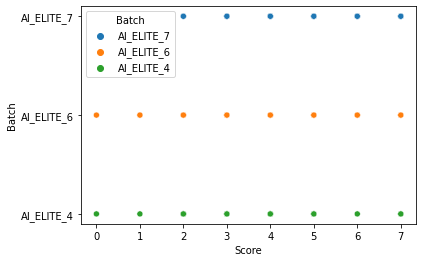

In [16]:
sns.scatterplot(data=df,x="Score",y="Batch",hue="Batch")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='Batch'>

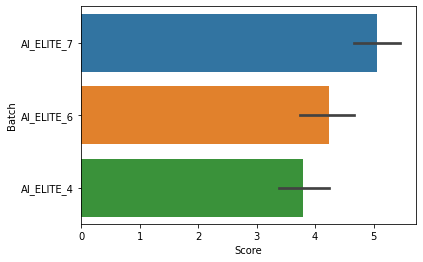

In [17]:
sns.barplot(df["Score"],df["Batch"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

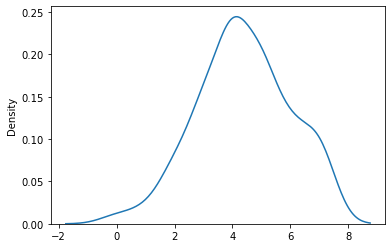

In [18]:
sns.distplot(x=df["Score"],hist=False)

(array([ 5., 12., 24., 40., 32., 36.]),
 array([0.        , 1.16666667, 2.33333333, 3.5       , 4.66666667,
        5.83333333, 7.        ]),
 <BarContainer object of 6 artists>)

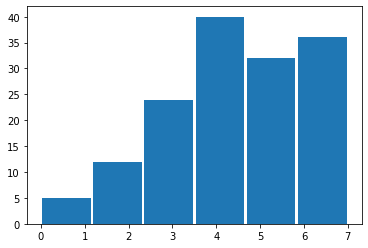

In [19]:
plt.hist(df["Score"],bins=6,rwidth=0.95)

In [20]:
df["Batch"].value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

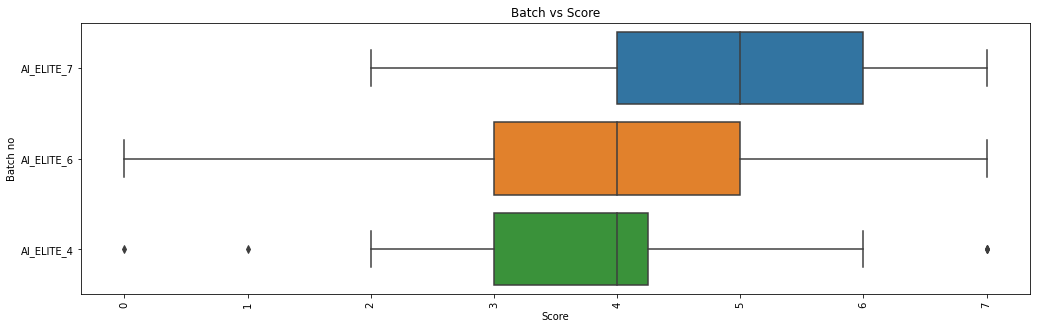

In [21]:
plt.figure(figsize=(17,5))
sns.boxplot(data=df,y="Batch",x="Score")
plt.xticks(rotation=90)
plt.xlabel=("Batch Score")
plt.ylabel("Batch no")
plt.title("Batch vs Score")
plt.show()

In [22]:
x=df.groupby("Score")

In [23]:
x.ngroups

8

In [24]:
df["Score"].unique()

array([6, 7, 4, 5, 3, 2, 0, 1])

In [25]:
df["Score"].value_counts()

4    40
5    32
3    24
6    18
7    18
2    12
1     3
0     2
Name: Score, dtype: int64

In [92]:
a=df.loc[(df["Batch"]=="AI_ELITE_7") & (df["Score"]>5)]

In [28]:
df.loc[(df["Batch"]=="AI_ELITE_7") & (df["Score"]<5)]

,Batch,User_ID,Score
4,AI_ELITE_7,uid_145,4
8,AI_ELITE_7,uid_141,3
11,AI_ELITE_7,uid_138,3
20,AI_ELITE_7,uid_129,4
25,AI_ELITE_7,uid_124,3
26,AI_ELITE_7,uid_123,4
28,AI_ELITE_7,uid_121,4
32,AI_ELITE_7,uid_117,3
33,AI_ELITE_7,uid_116,4
37,AI_ELITE_7,uid_112,2


In [33]:
df.loc[(df["Batch"]=="AI_ELITE_4") & (df["Score"]>=3)]

,Batch,User_ID,Score
101,AI_ELITE_4,uid_48,7
102,AI_ELITE_4,uid_47,5
103,AI_ELITE_4,uid_46,4
104,AI_ELITE_4,uid_45,4
105,AI_ELITE_4,uid_44,7
106,AI_ELITE_4,uid_43,5
107,AI_ELITE_4,uid_42,6
110,AI_ELITE_4,uid_39,4
112,AI_ELITE_4,uid_37,5
115,AI_ELITE_4,uid_34,4


In [38]:
df.loc[(df["Batch"]=="AI_ELITE_6") & (df["Score"]<=0)]

,Batch,User_ID,Score
68,AI_ELITE_6,uid_81,0


In [39]:
df.loc[(df["Batch"]=="AI_ELITE_4") & (df["Score"]<=0)]

,Batch,User_ID,Score
135,AI_ELITE_4,uid_14,0


In [40]:
df.loc[(df["Batch"]=="AI_ELITE_7") & (df["Score"]>=7)]

,Batch,User_ID,Score
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
5,AI_ELITE_7,uid_144,7
7,AI_ELITE_7,uid_142,7
15,AI_ELITE_7,uid_134,7
16,AI_ELITE_7,uid_133,7
17,AI_ELITE_7,uid_132,7
19,AI_ELITE_7,uid_130,7
24,AI_ELITE_7,uid_125,7
35,AI_ELITE_7,uid_114,7


In [41]:
df.loc[(df["Batch"]=="AI_ELITE_6") & (df["Score"]>=7)]

,Batch,User_ID,Score
63,AI_ELITE_6,uid_86,7
67,AI_ELITE_6,uid_82,7
74,AI_ELITE_6,uid_75,7
78,AI_ELITE_6,uid_71,7
98,AI_ELITE_6,uid_51,7


In [42]:
df.loc[(df["Batch"]=="AI_ELITE_4") & (df["Score"]>=7)]

,Batch,User_ID,Score
101,AI_ELITE_4,uid_48,7
105,AI_ELITE_4,uid_44,7
139,AI_ELITE_4,uid_10,7


In [86]:
x.get_group(4)

,Batch,User_ID,Score
4,AI_ELITE_7,uid_145,4
20,AI_ELITE_7,uid_129,4
26,AI_ELITE_7,uid_123,4
28,AI_ELITE_7,uid_121,4
33,AI_ELITE_7,uid_116,4
39,AI_ELITE_7,uid_110,4
40,AI_ELITE_7,uid_109,4
45,AI_ELITE_7,uid_104,4
47,AI_ELITE_7,uid_102,4
51,AI_ELITE_7,uid_98,4


In [45]:
df["Score"].mean()

4.382550335570469